<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

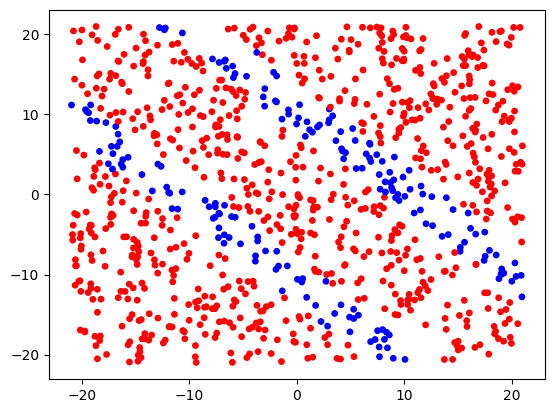

In [ ]:
n_samples = 1000

X = np.random.uniform(-21, 21, size=(n_samples, 2))
x1 = X[:, 0]
x2 = X[:, 1]
y = (
    ((x1 + x2 > 8) & (x1 + x2 < 14)) |
    ((x1 + x2 > -14) & (x1 + x2 < -8))
).astype(int)
y = y.reshape(-1, 1)


X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)


X_g = X
y_g = y

plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="bwr_r")


In [ ]:
# Decision Boundary for pytorch ANN

def decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Convert grid to Torch tensor
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_torch = torch.tensor(grid, dtype=torch.float32)

    model.eval()
    with torch.no_grad():
        Z = model(grid_torch)
        Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, levels=1, cmap='bwr_r', alpha=0.6)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y.squeeze(),
        cmap='bwr_r',
        edgecolors='k'
    )

    plt.axhline(0)
    plt.axvline(0)
    plt.grid(True)
    plt.show()


# Decision Boundary for custom ANN

def custom_db(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 100),
      np.linspace(y_min, y_max, 100)
  )

  grid = np.c_[xx.ravel(), yy.ravel()]
  Z= model.forward(grid)
  Z = Z.reshape(xx.shape)

  # ---------------------------
  # Plot
  # ---------------------------
  plt.figure(figsize=(6, 5))

  plt.contourf(xx, yy, Z, levels=0, cmap = 'bwr_r', alpha=0.6)
  plt.scatter(
      X[:, 0],
      X[:, 1],
      c=y.squeeze(),
      cmap = 'bwr_r',
      edgecolors="k"
  )

  plt.axhline(0)
  plt.axvline(0)
  plt.grid(True)
  plt.show()

In [ ]:

class ANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()

        self.fc1 = nn.Linear(input_dim,8)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(8, 4)
        self.relu = nn.ReLU()


        self.fc3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)


        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model = ANN(input_dim=X_train.shape[1])

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/1000], Loss: 0.6122
Epoch [20/1000], Loss: 0.5360
Epoch [30/1000], Loss: 0.4989
Epoch [40/1000], Loss: 0.4795
Epoch [50/1000], Loss: 0.4693
Epoch [60/1000], Loss: 0.4630
Epoch [70/1000], Loss: 0.4588
Epoch [80/1000], Loss: 0.4555
Epoch [90/1000], Loss: 0.4530
Epoch [100/1000], Loss: 0.4509
Epoch [110/1000], Loss: 0.4491
Epoch [120/1000], Loss: 0.4477
Epoch [130/1000], Loss: 0.4464
Epoch [140/1000], Loss: 0.4452
Epoch [150/1000], Loss: 0.4442
Epoch [160/1000], Loss: 0.4432
Epoch [170/1000], Loss: 0.4424
Epoch [180/1000], Loss: 0.4416
Epoch [190/1000], Loss: 0.4409
Epoch [200/1000], Loss: 0.4402
Epoch [210/1000], Loss: 0.4396
Epoch [220/1000], Loss: 0.4390
Epoch [230/1000], Loss: 0.4385
Epoch [240/1000], Loss: 0.4380
Epoch [250/1000], Loss: 0.4375
Epoch [260/1000], Loss: 0.4370
Epoch [270/1000], Loss: 0.4366
Epoch [280/1000], Loss: 0.4362
Epoch [290/1000], Loss: 0.4359
Epoch [300/1000], Loss: 0.4355
Epoch [310/1000], Loss: 0.4352
Epoch [320/1000], Loss: 0.4349
Epoch [330/1000],

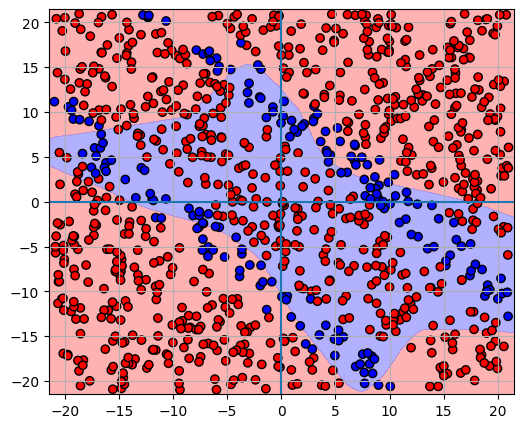

In [ ]:
decision_boundary(model, X_train, y_train)

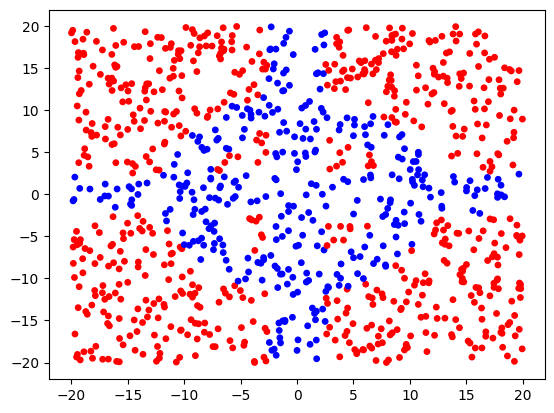

In [ ]:
np.random.seed(123)

n_samples = 1000

X = np.random.uniform(-20, 20, size=(n_samples, 2))

x = X[:, 0]
y = X[:, 1]

r = np.sqrt(x**2 + y**2)

ring = (r > 8) & (r < 12)

cross = (np.abs(x) < 2.5) | (np.abs(y) < 2.5)

y= (ring | cross).astype(int)

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)


X_t = X
y_t = y

plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="bwr_r")

In [ ]:
model = ANN(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epochs =1000
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/1000], Loss: 0.9458
Epoch [20/1000], Loss: 0.8645
Epoch [30/1000], Loss: 0.8024
Epoch [40/1000], Loss: 0.7540
Epoch [50/1000], Loss: 0.7158
Epoch [60/1000], Loss: 0.6858
Epoch [70/1000], Loss: 0.6620
Epoch [80/1000], Loss: 0.6431
Epoch [90/1000], Loss: 0.6279
Epoch [100/1000], Loss: 0.6155
Epoch [110/1000], Loss: 0.6052
Epoch [120/1000], Loss: 0.5966
Epoch [130/1000], Loss: 0.5893
Epoch [140/1000], Loss: 0.5831
Epoch [150/1000], Loss: 0.5778
Epoch [160/1000], Loss: 0.5733
Epoch [170/1000], Loss: 0.5693
Epoch [180/1000], Loss: 0.5657
Epoch [190/1000], Loss: 0.5626
Epoch [200/1000], Loss: 0.5597
Epoch [210/1000], Loss: 0.5572
Epoch [220/1000], Loss: 0.5549
Epoch [230/1000], Loss: 0.5528
Epoch [240/1000], Loss: 0.5509
Epoch [250/1000], Loss: 0.5491
Epoch [260/1000], Loss: 0.5475
Epoch [270/1000], Loss: 0.5460
Epoch [280/1000], Loss: 0.5446
Epoch [290/1000], Loss: 0.5432
Epoch [300/1000], Loss: 0.5420
Epoch [310/1000], Loss: 0.5408
Epoch [320/1000], Loss: 0.5397
Epoch [330/1000],

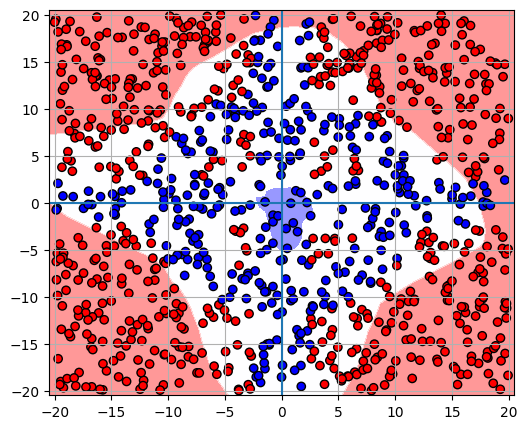

In [ ]:
decision_boundary(model, X_train, y_train)

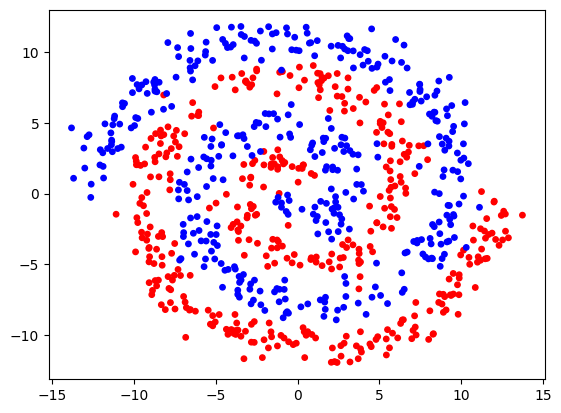

In [ ]:
np.random.seed(42)

n_samples = 800
noise = 0.8

n = n_samples // 2
theta = np.sqrt(np.random.rand(n)) * 4 * np.pi
r = theta

x1 = r * np.cos(theta) + np.random.normal(0, noise, n)
y1 = r * np.sin(theta) + np.random.normal(0, noise, n)

x2 = -r * np.cos(theta) + np.random.normal(0, noise, n)
y2 = -r * np.sin(theta) + np.random.normal(0, noise, n)

X = np.vstack([
    np.stack([x1, y1], axis=1),
    np.stack([x2, y2], axis=1)
])

y = np.array([0]*n + [1]*n)


X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)


X_s = X
y_s = y

plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap="bwr_r")

In [ ]:
model = ANN(input_dim=X_train.shape[1])

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs =5000

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/5000], Loss: 0.6315
Epoch [200/5000], Loss: 0.6229
Epoch [300/5000], Loss: 0.6180
Epoch [400/5000], Loss: 0.6139
Epoch [500/5000], Loss: 0.6107
Epoch [600/5000], Loss: 0.6049
Epoch [700/5000], Loss: 0.5906
Epoch [800/5000], Loss: 0.5733
Epoch [900/5000], Loss: 0.5497
Epoch [1000/5000], Loss: 0.5288
Epoch [1100/5000], Loss: 0.5059
Epoch [1200/5000], Loss: 0.4825
Epoch [1300/5000], Loss: 0.4643
Epoch [1400/5000], Loss: 0.4481
Epoch [1500/5000], Loss: 0.4373
Epoch [1600/5000], Loss: 0.4292
Epoch [1700/5000], Loss: 0.4229
Epoch [1800/5000], Loss: 0.4171
Epoch [1900/5000], Loss: 0.4100
Epoch [2000/5000], Loss: 0.4027
Epoch [2100/5000], Loss: 0.3938
Epoch [2200/5000], Loss: 0.3856
Epoch [2300/5000], Loss: 0.3783
Epoch [2400/5000], Loss: 0.3707
Epoch [2500/5000], Loss: 0.3618
Epoch [2600/5000], Loss: 0.3525
Epoch [2700/5000], Loss: 0.3458
Epoch [2800/5000], Loss: 0.3374
Epoch [2900/5000], Loss: 0.3302
Epoch [3000/5000], Loss: 0.3251
Epoch [3100/5000], Loss: 0.3194
Epoch [3200/5000]

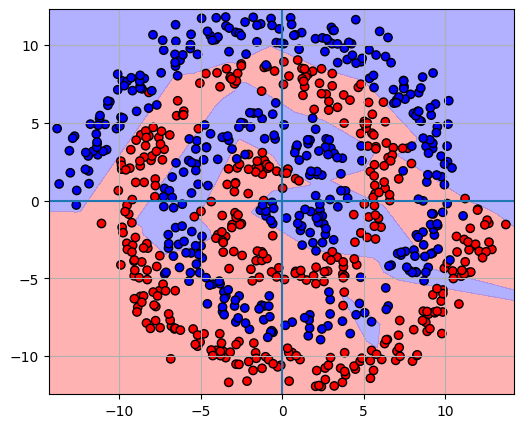

In [ ]:
decision_boundary(model, X_train, y_train)


Testing on Custom ANN

In [ ]:
class ReLU:
  def __init__(self,):
    pass
  def forward(self, z):
    self.input_ = z
    return np.maximum(z, 0)

  def backward(self, delta):
    return delta * (self.input_ > 0).astype(int)


class Sigmoid:
  def __init__(self,):
    pass

  def forward(self, z):
    self.o =  1 / (1+ np.exp(-z))
    return self.o

  def backward(self, delta):
    return self.o * (1 - self. o)



def BCELoss(y_hat, y):
  eps = 1e-6
  return - np.mean(y * np.log(y_hat +eps) + (1-y) * np.log(1 - y_hat + eps))


In [ ]:
class Layer:
  def __init__(self, out, features, activation = "ReLU", last_layer = False):
    self.weights = np.random.randn(out, features)
    self.bias = np.random.randn(1, out)
    self.last_layer = last_layer

    all_activation = {"ReLU": ReLU(), "Sigmoid": Sigmoid()}
    self.activation = all_activation[activation]


  def forward(self, X):
    self.input_ = X
    o = X @ self.weights.T + self.bias
    o = self.activation.forward(o)
    return o

  def backward(self, delta, lr):
    dl = delta

    if self.last_layer == False:
      dl = self.activation.backward(dl)


    dw = dl.T @ self.input_
    db = np.sum(dl, keepdims=True, axis=0)


    dX =  dl @ self.weights

    self.weights -= lr * dw
    self.bias -= lr * db

    return dX



In [ ]:
class ANN:
  def __init__(self, layers):
    self.layers = layers

  def forward(self, X):
    input_ = X
    for layer in self.layers:
      input_ = layer.forward(input_)
    return input_

  def backward(self, delta, lr):
    dl = delta
    for layer in reversed(self.layers):
      dl = layer.backward(dl, lr)




In [ ]:

model = ANN([
    Layer(64, 2),
    Layer(32, 64),
    Layer(16, 32),
    Layer(1, 16, activation="Sigmoid", last_layer= True),
])

epochs =5000
lr = 0.001

for i in range(epochs):
  y_hat = model.forward(X_g)
  loss = BCELoss(y_hat, y_g)

  n = X_g.shape[0]
  dl = (y_hat - y_g) / n


  model.backward(dl, lr)

  if i%100==0:
    print(loss)




/tmp/ipython-input-649226605.py:17: RuntimeWarning: overflow encountered in exp
  self.o =  1 / (1+ np.exp(-z))


6.58097879817155
2.172251120624368
1.4823312518475218
1.7088641538706126
1.5519816271631013
1.3365557388078853
1.1506124393655417
0.8315461188345363
0.9573010817932566
0.7648086717333809
0.5497179403006996
0.6009219778925581
0.513066157609668
0.5719634964392396
0.3235518069181119
0.5052647492677433
0.4385575042485581
0.4006336370390984
0.33270954159746635
0.32890329632028703
0.3388150401899291
0.32713056125242257
0.31844539585804743
0.31010839414840163
0.3032894930942647
0.29750210059438
0.29200606778823396
0.24972374115075313
0.24421591037969637
0.23916005345930297
0.23543148200779468
0.23241741067633234
0.22812152855512202
0.2239817711216458
0.22078481265171418
0.21796712029655305
0.21511652835729758
0.21248989734266788
0.21000098301872583
0.2075480393272478
0.20538462344895358
0.20312220929592875
0.20109116802823396
0.1991262229971528
0.19719381010481263
0.195582322914935
0.193908424024329
0.19242726373759123
0.19094661710389726
0.1894836341731967


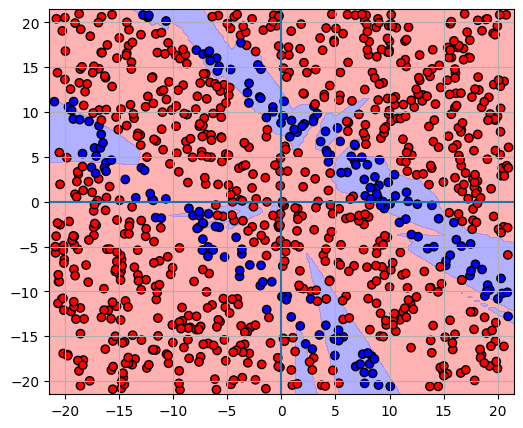

In [ ]:
custom_db(model, X_g, y_g)

In [ ]:
w = model.layers[3].weights

In [ ]:
w.shape

(1, 16)

In [ ]:

model = ANN([
    Layer(64, 2),
    Layer(32, 64),
    Layer(16, 32),
    Layer(1, 16, activation="Sigmoid", last_layer= True),
])

epochs =5000
lr = 0.001

for i in range(epochs):
  y_hat = model.forward(X_s)
  loss = BCELoss(y_hat, y_s)

  n = X_s.shape[0]
  dl = (y_hat - y_s) / n


  model.backward(dl, lr)

  if i%100==0:
    print(loss)




/tmp/ipython-input-649226605.py:17: RuntimeWarning: overflow encountered in exp
  self.o =  1 / (1+ np.exp(-z))


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 800)